<a href="https://colab.research.google.com/github/mikolaura/stable_diffusion/blob/master/demo_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

--2024-10-03 17:45:54--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 3.163.189.114, 3.163.189.90, 3.163.189.74, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.114|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1728234469&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyODIzNDQ2OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy82Ni82Zi82NjZmNDY1ZmE3MDE1ODUxNTQwNGU4ZGUyYzZiYzZmZTJmOTBjNDZmOTI5NjI5M2FhMTRkYWVkZWRlYjMyYzUyL2NjNmNiMjcxMDM0MTczMjVmZjk0ZjUyYjdhNWQyZGRlNDVhNzUxNWIyNWMyNTVkOGUzOT

In [2]:
!git clone https://github.com/mikolaura/stable_diffusion.git

Cloning into 'stable_diffusion'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 128 (delta 64), reused 97 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 640.60 KiB | 2.21 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [3]:
!pip install transformers pytorch_lightning lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 55.0 MB/s eta 0:00:00


In [4]:
import shutil
import os
shutil.move("stable_diffusion/sd", ".")
list_files = os.listdir('sd')
for files in list_files:
  shutil.move('sd/'+files, files)

device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 50/50 [00:26<00:00,  1.88it/s]


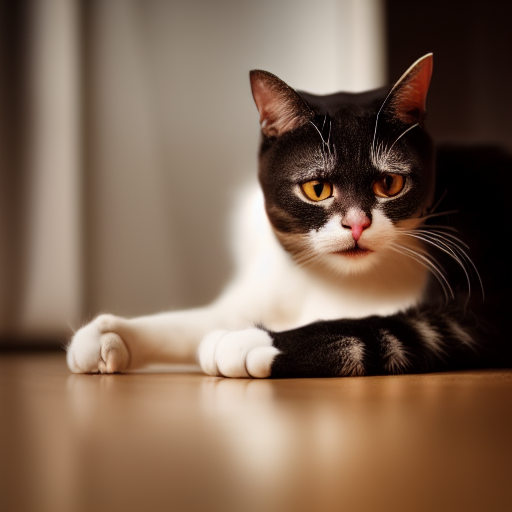

In [5]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

device = "cpu"
ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available and ALLOW_CUDA:
    device ='cuda'

print(f"device: {device}")

tokenizer = CLIPTokenizer("stable_diffusion/data/vocab.json", merges_file="stable_diffusion/data/merges.txt")
model_file = "./v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, device)
## TEXT TO IMAGE
# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=device,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)